Which tracks favor overtaking?

Analyze which tracks are easier to overtake cars in, which will really help the drivers choose their pitstop strategies, thus they will have shorter stints but faster pace.
This will be decided by seeing the start position of each driver and the end position at the end of the race, the track will favor overtaking if the positions of the drivers changed a lot from their position at the first of the race


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
circuits_df = pd.read_csv('dataset/circuits.csv')
circuits_df.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [3]:
races_df = pd.read_csv('dataset/races.csv')
races_df.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [4]:
laps_df = pd.read_csv('dataset/lap_times.csv')
laps_df.head()

,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [5]:
d1 = laps_df[laps_df.driverId == 1]
d1

,raceId,driverId,lap,position,time,milliseconds
58,841,1,1,2,1:40.573,100573
59,841,1,2,2,1:33.774,93774
60,841,1,3,2,1:32.900,92900
61,841,1,4,2,1:32.582,92582
62,841,1,5,2,1:32.471,92471
...,...,...,...,...,...,...
537228,1096,1,51,4,1:30.455,90455
537229,1096,1,52,4,1:30.375,90375
537230,1096,1,53,4,1:30.824,90824
537231,1096,1,54,4,1:30.961,90961


In [6]:
cir_races_df = pd.merge(circuits_df, races_df, on = 'circuitId')
cir_races_df.head()

,circuitId,circuitRef,name_x,location,country,lat,lng,alt,url_x,raceId,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,18,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,36,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,55,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,71,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [7]:
cir_races_laps_df = pd.merge(cir_races_df, laps_df, on = 'raceId')
cir_races_df.head()

,circuitId,circuitRef,name_x,location,country,lat,lng,alt,url_x,raceId,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,18,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,36,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,55,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,71,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [8]:
final_df = cir_races_laps_df[['circuitId', 'raceId', 'driverId', 'lap', 'position']]
final_df

,circuitId,raceId,driverId,lap,position
0,1,1,1,1,13
1,1,1,1,2,12
2,1,1,1,3,11
3,1,1,1,4,10
4,1,1,1,5,10
...,...,...,...,...,...
538116,79,1078,20,50,11
538117,79,1078,20,51,11
538118,79,1078,20,52,11
538119,79,1078,20,53,9


In [9]:
df_ = final_df.groupby(['circuitId', 'driverId', 'raceId'], group_keys=True).apply(lambda x: x)
df_

circuitId  raceId  driverId  lap  position
circuitId driverId raceId                                                   
1         1        1      0               1       1         1    1        13
                          1               1       1         1    2        12
                          2               1       1         1    3        11
                          3               1       1         1    4        10
                          4               1       1         1    5        10
...                                     ...     ...       ...  ...       ...
79        855      1078   537777         79    1078       855    2        14
                          537778         79    1078       855    3        14
                          537779         79    1078       855    4        14
                          537780         79    1078       855    5        14
                          537781         79    1078       855    6        20

[538121 rows x 5 columns]

In [10]:
df_1 = df_[df_.circuitId == 1]
df_1 = df_1[df_1.raceId == 1]
df_1 = df_1[df_1.driverId == 1]
df_1.head()

circuitId  raceId  driverId  lap  position
circuitId driverId raceId                                              
1         1        1      0          1       1         1    1        13
                          1          1       1         1    2        12
                          2          1       1         1    3        11
                          3          1       1         1    4        10
                          4          1       1         1    5        10

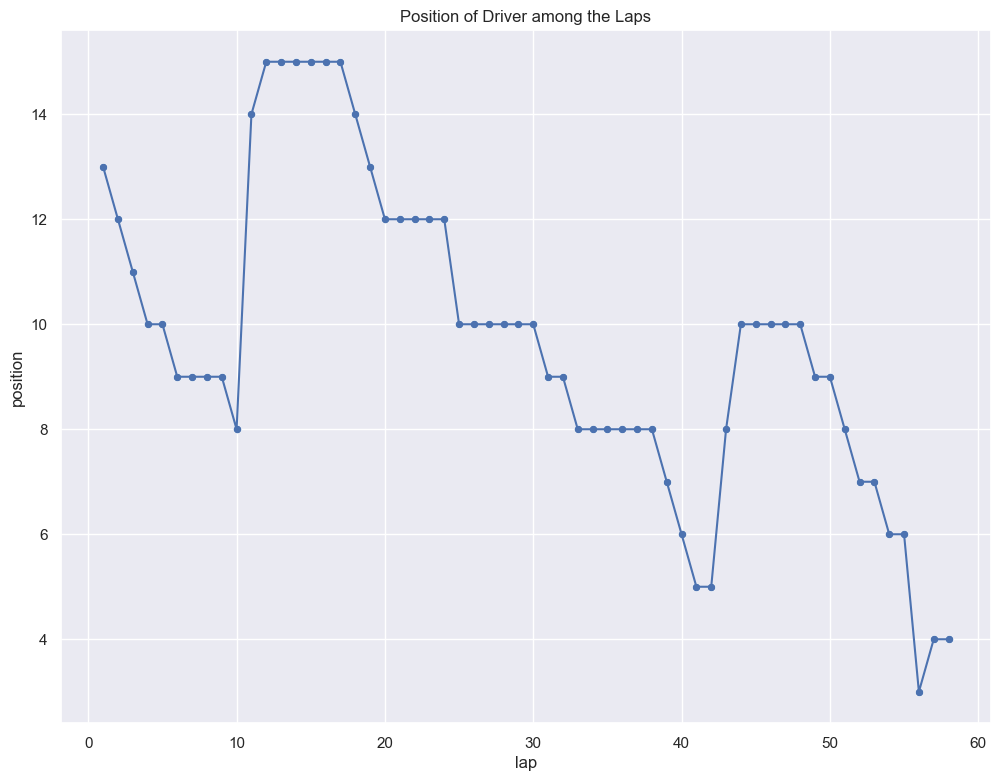

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(12,9)})

sns.scatterplot(data = df_1, x='lap', y='position')
sns.lineplot(data = df_1, x='lap', y='position')
plt.title('Position of Driver among the Laps')
plt.show()

# plt.scatter(df_.lap,df_.position)
# plt.plot(df_.lap,df_.position)
# plt.show()

In [12]:
df_grouped = final_df.groupby(['circuitId', 'driverId', 'raceId'])['position'].var()
df_grouped

circuitId  driverId  raceId
1          1         1         8.925892
                     18        0.545977
                     36        0.389897
                     338       2.604961
                     841       0.049909
                                 ...   
79         848       1078      6.607769
           849       1078      1.848371
           852       1078      7.981830
           854       1078      7.348371
           855       1078      6.000000
Name: position, Length: 10146, dtype: float64

In [13]:
df_grouped.to_csv('dataset/overtaking_temp.csv')

In [14]:
df_g = pd.read_csv('dataset/overtaking_temp.csv')
df_g.head()

,circuitId,driverId,raceId,position
0,1,1,1,8.925892
1,1,1,18,0.545977
2,1,1,36,0.389897
3,1,1,338,2.604961
4,1,1,841,0.049909


In [15]:
score_df = df_g.groupby(['circuitId', 'driverId'])['position'].mean()
score_df

circuitId  driverId
1          1           1.662903
           2           4.674939
           3           2.349151
           4           5.657248
           5           1.849950
                         ...   
79         848         6.607769
           849         1.848371
           852         7.981830
           854         7.348371
           855         6.000000
Name: position, Length: 2715, dtype: float64

In [16]:
score_df.to_csv('dataset/tracks_overtaking.csv')

In [17]:
scores = pd.read_csv('dataset/tracks_overtaking.csv')
scores.rename(columns={'position':'position variance'}, inplace=True)
scores.head()

,circuitId,driverId,position variance
0,1,1,1.662903
1,1,2,4.674939
2,1,3,2.349151
3,1,4,5.657248
4,1,5,1.849950


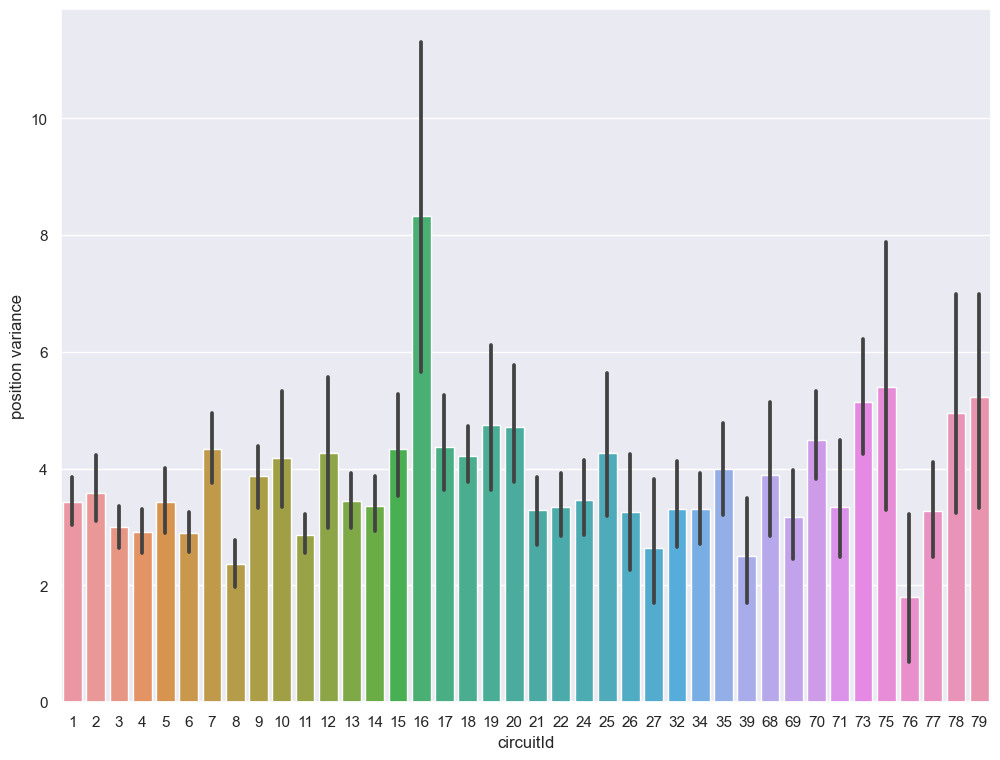

In [18]:
sns.set(rc={'figure.figsize':(12,9)})
sns.barplot(x = 'circuitId',y = 'position variance',data = scores)
plt.show()

In [20]:
# # plot pie chart for installs values
# plt.figure(figsize=(10,10))
# plt.pie(scores, labels=scores.circuitId, autopct='%1.1f%%',  startangle=140)
# plt.title('Average Installs per Category')